# Brain_Tumor_Detection_Classification

## Load Modules

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

## Prepare/Collect Data

In [8]:
import os

path = os.listdir(r'D:\Softwares\21\Anuj\D_S\Projects\Codel Clause\brain-tumor-detection-master\brain_tumor\Training')
classes = {'no_tumor': 0, 'pituitary_tumor': 1}

In [10]:
import cv2

X = []
Y = []
for cls in classes:
    pth = r'D:\Softwares\21\Anuj\D_S\Projects\Codel Clause\brain-tumor-detection-master\brain_tumor\Training' + '\\' + cls
    for j in os.listdir(pth):
        img = cv2.imread(pth + '\\' + j, 0)
        img = cv2.resize(img, (200, 200))
        X.append(img)
        Y.append(classes[cls])

In [11]:
np.unique(Y)

array([0, 1])

In [12]:
X = np.array(X)
Y = np.array(Y)

In [13]:
pd.Series(Y).value_counts()

1    827
0    395
dtype: int64

In [14]:
X.shape

(1222, 200, 200)

## Visualize data 

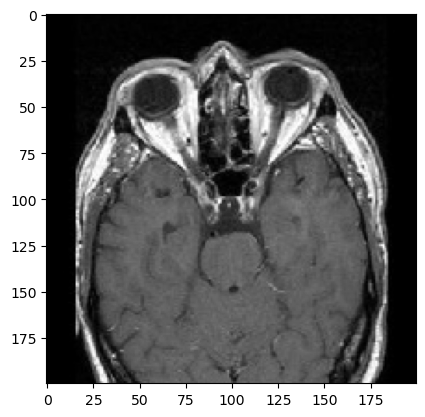

In [16]:
plt.imshow(X[0], cmap = 'gray')
plt.show()

## Prepare Data

In [17]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

## Split Data

In [18]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state = 10, test_size = 0.20)

In [19]:
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

## Feature Scaling

In [23]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


## Feature Selection: PCA

In [24]:
from sklearn.decomposition import PCA

In [26]:
print(xtrain.shape, xtest.shape)

pca = PCA(.98)
#pca_train = pca.fit_transform(xtrain)
#pca_test = pca.transform(xtest)
pca_train = xtrain
pca_test = xtest

(977, 40000) (245, 40000)


In [27]:
#print(pca_train.shape, pca_test.shape)
#print(pca.n_components_)
#print(pca.n_features_)

## Train Model

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [31]:
import warnings
warnings.filterwarnings('ignore')

lg = LogisticRegression(C=0.1)
lg.fit(pca_train, ytrain)

LogisticRegression(C=0.1)

In [32]:
sv = SVC()
sv.fit(pca_train, ytrain)

SVC()

# Evaluation

In [33]:
print("Training Score:", lg.score(pca_train, ytrain))
print("Testing Score:", lg.score(pca_test, ytest))

Training Score: 1.0
Training Score: 0.9591836734693877


In [35]:
print("Training Score:", sv.score(pca_train, ytrain))
print("Testing Score:", sv.score(pca_test, ytest))

Training Score: 0.9938587512794268
Testing Score: 0.963265306122449


## Prediction 

In [38]:
pred = sv.predict(pca_test)
np.where(ytest != pred)

(array([ 36,  51,  68, 120, 212, 214, 220, 227, 239], dtype=int64),)

In [39]:
pred[6]

0

In [40]:
ytest[6]

0

## TEST MODEL

In [41]:
dec = {0: 'No Tumor', 1: 'Positive Tumor'}

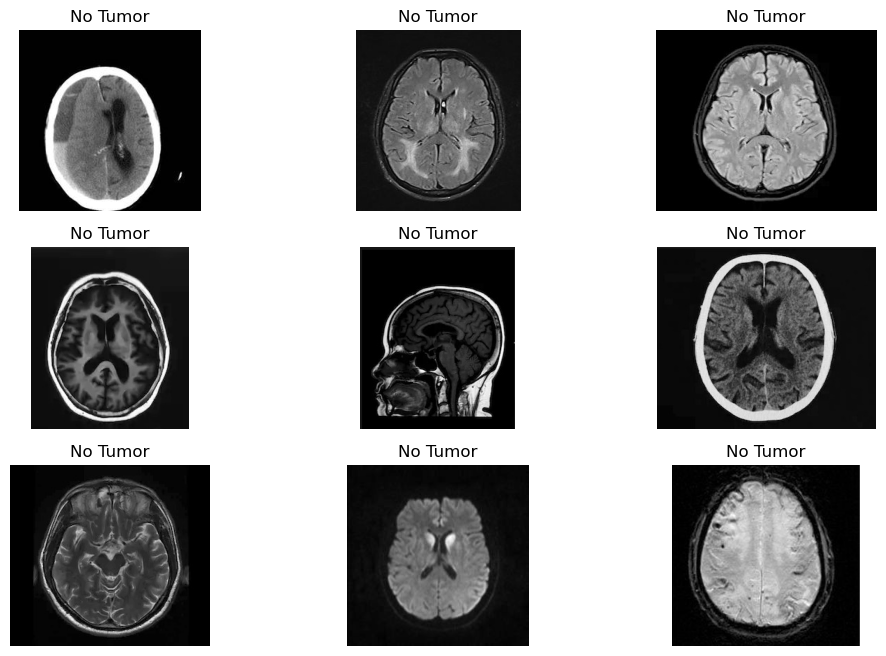

In [50]:
plt.figure(figsize=(12, 8))
p = os.listdir('D:/Softwares/21/Anuj/D_S/Projects/Codel Clause/brain-tumor-detection-master/brain_tumor/Testing/')
c = 1
for i in os.listdir('D:/Softwares/21/Anuj/D_S/Projects/Codel Clause/brain-tumor-detection-master/brain_tumor/Testing/no_tumor/')[:9]:
    plt.subplot(3, 3, c)
    
    img = cv2.imread('D:/Softwares/21/Anuj/D_S/Projects/Codel Clause/brain-tumor-detection-master/brain_tumor/Testing/no_tumor/'+i, 0)
    img1 = cv2.resize(img, (200, 200))
    img1 = img1.reshape(1, -1) / 255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c += 1

plt.show()

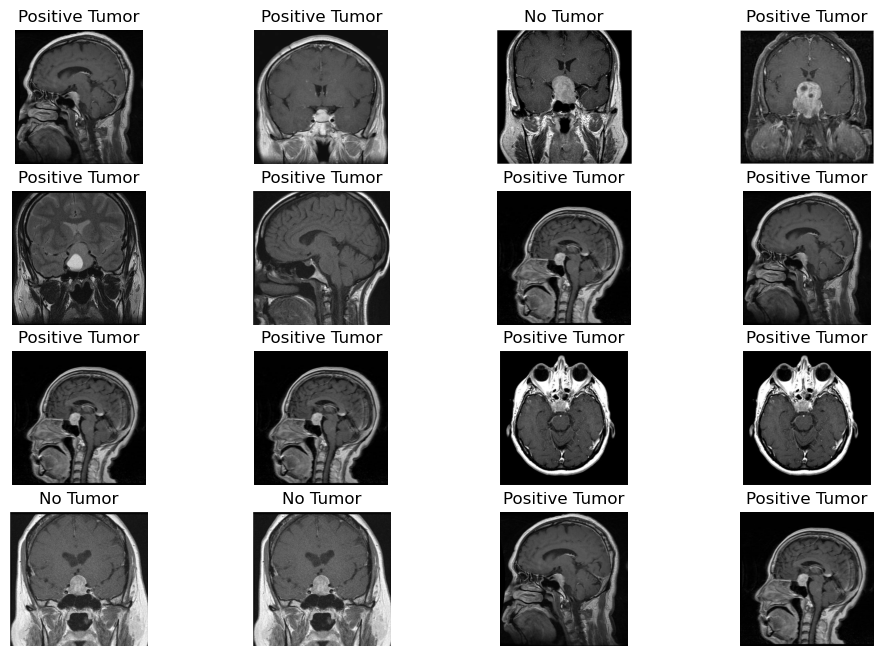

In [53]:
plt.figure(figsize=(12, 8))
p = os.listdir('D:/Softwares/21/Anuj/D_S/Projects/Codel Clause/brain-tumor-detection-master/brain_tumor/Testing/')
c = 1

for i in os.listdir('D:/Softwares/21/Anuj/D_S/Projects/Codel Clause/brain-tumor-detection-master/brain_tumor/Testing/pituitary_tumor')[:16]:
    plt.subplot(4, 4, c)
    
    img = cv2.imread('D:/Softwares/21/Anuj/D_S/Projects/Codel Clause/brain-tumor-detection-master/brain_tumor/Testing/pituitary_tumor/' + i, 0)
    if img is not None:
        img1 = cv2.resize(img, (200, 200))
        img1 = img1.reshape(1, -1) / 255
        p = sv.predict(img1)
        plt.title(dec[p[0]])
        plt.imshow(img, cmap='gray')
        plt.axis('off')
        c += 1

plt.show()